<a href="https://colab.research.google.com/github/2300080260/CodeDeployGitHubDemo1/blob/main/Copy_of_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This line installs the necessary libraries.
# dlib is for face detection and landmarks.
# opencv-python-headless is for image processing (headless means no GUI needed).
# cmake is required to build dlib.
!pip install dlib opencv-python-headless cmake

In [ ]:
# Download the 68-point facial landmark predictor
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

# Due to persistent issues with external links for hairstyle images,
# we will now ask the user to upload them directly.
print("Please upload two transparent hairstyle PNG files (e.g., hairstyle1.png and hairstyle2.png).")
print("You can find examples online or use these: ")
print("  /content/—Pngtree—curly girl hair transparent image_12168806.png (save as hairstyle1.png)")
print("  - https://github.com/davisean/virtual_hairstyle_tryon/raw/master/images/women/2.png (save as hairstyle2.png)")

uploaded_hairstyles = files.upload()

if 'hairstyle1.png' not in uploaded_hairstyles or 'hairstyle2.png' not in uploaded_hairstyles:
    print("Error: Please upload both 'hairstyle1.png' and 'hairstyle2.png'.")
else:
    print("✅ All models and assets downloaded/uploaded.")

--2025-11-16 07:53:30--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-11-16 07:53:30--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.9’

shape_predictor_68_ 100%[===================>]  61.07M  44.7MB/s    in 1.4s    

2025-11-16 07:53:32 (44.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.9’ saved [64040097/64040097]

bunzip2: Output file shape_predictor_68_face_landmarks.dat already exists.
Please upload two transparent hairstyle PNG files (e.g., hairstyle1.png and hairstyle2.png).
You can 

Saving hairstyle1.png to hairstyle1 (3).png
Error: Please upload both 'hairstyle1.png' and 'hairstyle2.png'.


In [ ]:
import dlib
import cv2
from PIL import Image  # Used for easy pasting of transparent PNGs
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

print("Libraries imported.")

Libraries imported.


In [ ]:
# Load the pre-trained dlib models
predictor_path = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

def analyze_face_shape(img_path):
    """
    Analyzes an image to find a face and estimate its shape.
    This is a SIMPLIFIED estimation. Real face shape analysis is very complex.
    """
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: could not read image at {img_path}")
        return "Unknown", None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray, 1)

    if len(faces) == 0:
        print("No face detected!")
        return "No Face", None, None

    # We'll just use the first face found
    face = faces[0]
    shape = predictor(gray, face)

    # --- Simplified Face Shape Logic ---
    # We'll use a very simple width-to-height ratio
    # Landmark 0 = left jaw, 16 = right jaw, 8 = bottom of chin
    # Landmark 27 = top of nose bridge

    face_width = shape.part(16).x - shape.part(0).x

    # Calculate a rough face height from nose bridge to chin
    face_height = shape.part(8).y - shape.part(27).y

    if face_width <= 0 or face_height <= 0:
        return "Unknown", face, shape

    ratio = face_width / face_height

    # These ratios are just examples!
    if ratio > 0.95:
        face_shape = "Round"
    elif 0.85 < ratio <= 0.95:
        face_shape = "Oval"
    else:
        face_shape = "Heart"

    return face_shape, face, shape

def get_recommendations(face_shape):
    """
    Returns a dictionary of recommended hairstyles (name: image_path)
    based on the detected face shape.
    """
    # This is where we link our downloaded hairstyles
    all_styles = {
        "Long Bob": "hairstyle1.png",
        "Wavy Layers": "hairstyle2.png"
    }

    # In a real app, this logic would be more complex
    if face_shape == "Round":
        return {"Long Bob": all_styles["Long Bob"]}
    elif face_shape == "Oval":
        return {"Wavy Layers": all_styles["Wavy Layers"]}
    else:
        # Default for "Heart" or "No Face"
        return all_styles

def apply_hairstyle(user_image_path, hairstyle_path, face, shape):
    """
    Overlays a hairstyle PNG onto the user's face using the detected
    face boundaries and landmarks. This is a "sticker" simulation.
    """
    # Load user image and hairstyle image using PIL (better for transparency)
    user_img = Image.open(user_image_path).convert("RGBA")
    hairstyle_img = Image.open(hairstyle_path).convert("RGBA")

    # --- Positioning and Scaling Logic ---

    # 1. Get face width from the dlib 'face' object
    face_width = face.right() - face.left()

    # 2. Scale hairstyle to be slightly wider than the face
    # We'll make it 1.5x the face width, you can tweak this
    scale_factor = (face_width * 1.5) / hairstyle_img.width
    new_hair_width = int(hairstyle_img.width * scale_factor)
    new_hair_height = int(hairstyle_img.height * scale_factor)

    hairstyle_img = hairstyle_img.resize((new_hair_width, new_hair_height), Image.LANCZOS)

    # 3. Calculate position to paste the hairstyle
    # We'll align the center of the hair with the center of the face's top edge

    # Center of the face's top edge
    face_top_center_x = (face.left() + face.right()) // 2

    # Position 'y' (vertical)
    # We'll align the hairstyle so its bottom 1/4 is at the top of the face
    # This is tricky and requires tweaking!
    pos_y = face.top() - int(new_hair_height * 0.75)

    # Position 'x' (horizontal)
    pos_x = face_top_center_x - (new_hair_width // 2)

    # Create a new blank canvas (copy of user image) to paste onto
    result_img = user_img.copy()

    # 4. Paste the hairstyle using its alpha (transparency) channel as the mask
    result_img.paste(hairstyle_img, (pos_x, pos_y), hairstyle_img)

    return result_img

print("✅ Helper functions defined.")

✅ Helper functions defined.


Please upload a clear, forward-facing photo.


Saving Screenshot 2025-11-16 at 1.25.35 PM.png to Screenshot 2025-11-16 at 1.25.35 PM.png

Uploaded: user_photo.jpg


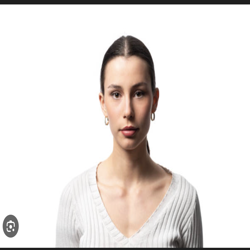

In [ ]:
# Clear any old uploads
if 'user_photo.jpg' in os.listdir():
    os.remove('user_photo.jpg')

print("Please upload a clear, forward-facing photo.")
uploaded = files.upload()

if not uploaded:
    print("No file uploaded. Please re-run this cell and upload a file.")
else:
    # Rename the uploaded file to a consistent name
    original_name = list(uploaded.keys())[0]
    os.rename(original_name, 'user_photo.jpg')
    user_image_path = 'user_photo.jpg'

    # Display the uploaded image
    print(f"\nUploaded: {user_image_path}")
    display(Image.open(user_image_path).resize((250, 250))) # Show a thumbnail


In [ ]:
print("Analyzing face...")
user_image_path = 'user_photo.jpg' # From previous cell

if not os.path.exists(user_image_path):
    print("Error: Please run Cell 5 to upload an image first.")
else:
    face_shape, face_rect, face_landmarks = analyze_face_shape(user_image_path)

    if face_shape == "No Face":
        print("Could not detect a face in the image. Please try a different photo.")
    else:
        print(f"Detected face shape: {face_shape}")

        recommendations = get_recommendations(face_shape)
        print(f"Recommending {len(recommendations)} hairstyle(s)...")

        result_images = []
        for style_name, style_path in recommendations.items():
            print(f"...Applying '{style_name}'")
            try_on_img = apply_hairstyle(user_image_path, style_path, face_rect, face_landmarks)
            result_images.append((style_name, try_on_img))

        print("\n✅ Analysis complete!")

Analyzing face...
Detected face shape: Round
Recommending 1 hairstyle(s)...
...Applying 'Long Bob'

✅ Analysis complete!


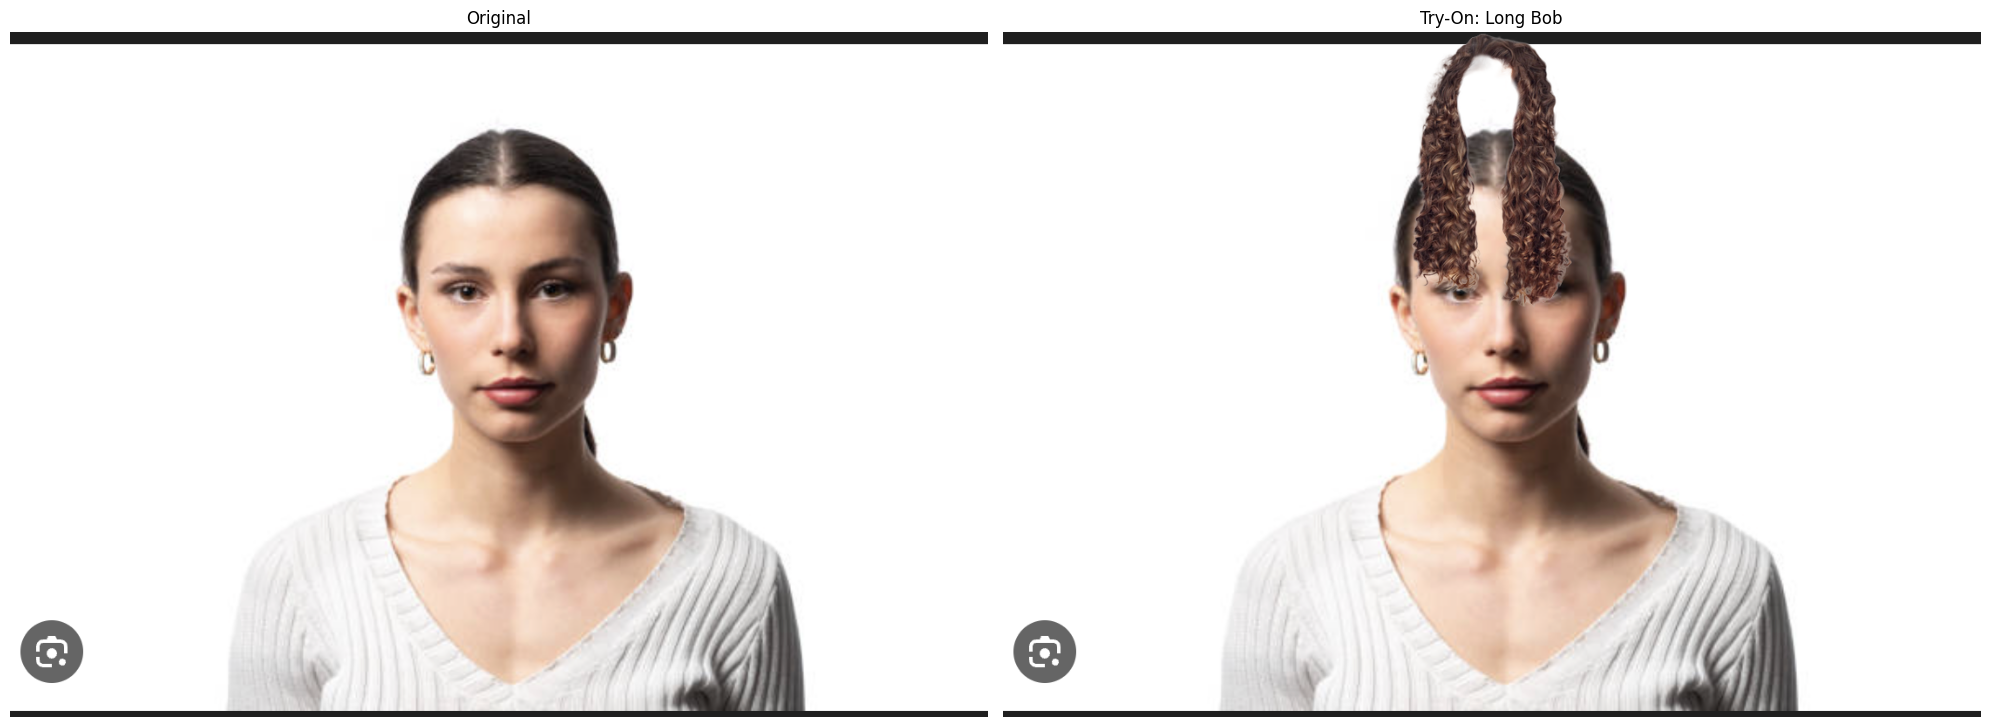

In [ ]:
if 'result_images' not in globals() or not result_images:
    print("No results to display. Please run Cell 5 and Cell 6 first.")
else:
    num_images = len(result_images) + 1 # +1 for the original

    plt.figure(figsize=(20, 10))

    # 1. Plot Original Image
    plt.subplot(1, num_images, 1)
    plt.title("Original")
    original_display_img = cv2.imread(user_image_path)
    plt.imshow(cv2.cvtColor(original_display_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # 2. Plot Result Images
    for i, (style_name, img) in enumerate(result_images):
        plt.subplot(1, num_images, i + 2)
        plt.title(f"Try-On: {style_name}")
        plt.imshow(img) # PIL image
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# (Keep all previous imports and initializations)

def apply_hairstyle_improved(user_image_path, hairstyle_path, face, shape):
    """
    Overlays a hairstyle PNG onto the user's face using more refined
    landmark-based positioning. This is still a "sticker" simulation.
    """
    user_img_pil = Image.open(user_image_path).convert("RGBA")
    hairstyle_img_pil = Image.open(hairstyle_path).convert("RGBA")

    # Convert PIL image to OpenCV for processing if needed, then back for pasting
    user_img_cv = np.array(user_img_pil)
    user_img_cv = cv2.cvtColor(user_img_cv, cv2.COLOR_RGBA2BGRA) # Use BGRA for OpenCV transparency

    # Extract relevant facial landmarks (dlib's 68-point model)
    # Example points:
    # 0, 16: Left and right jaw points (for overall face width)
    # 17, 26: Left and right eyebrow outer points (for forehead/temple width)
    # 27: Nose bridge (can be a reference for the top center of the face)

    # Calculate actual face width using outer jaw points
    face_width_from_landmarks = shape.part(16).x - shape.part(0).x

    # Calculate forehead width (approximation using eyebrow points)
    forehead_width = shape.part(26).x - shape.part(17).x

    # Use forehead width for hair scaling and positioning
    # The hair should generally be wider than the forehead
    target_hair_width = int(forehead_width * 1.5) # Adjust this multiplier based on hairstyle type

    # Calculate new dimensions for the hairstyle
    aspect_ratio = hairstyle_img_pil.width / hairstyle_img_pil.height
    new_hair_width = target_hair_width
    new_hair_height = int(new_hair_width / aspect_ratio)

    # Resize the hairstyle image
    hairstyle_img_pil_resized = hairstyle_img_pil.resize((new_hair_width, new_hair_height), Image.LANCZOS)

    # --- Positioning ---
    # Center of the upper forehead (midpoint between eyebrows + adjusted upwards)
    forehead_center_x = (shape.part(17).x + shape.part(26).x) // 2
    # The top of the eyebrows might be landmark 20 or 23, but a bit above them is where hair starts
    # We'll approximate starting y a bit above the nose bridge (landmark 27)
    # This value needs a lot of trial and error
    start_y = shape.part(27).y - int(new_hair_height * 0.8) # Adjust this multiplier and offset

    # Calculate top-left corner for pasting
    pos_x = forehead_center_x - (new_hair_width // 2)
    pos_y = start_y

    # Ensure position is not negative
    pos_x = max(0, pos_x)
    pos_y = max(0, pos_y)

    # Create a new blank canvas (copy of user image) to paste onto
    result_img_pil = user_img_pil.copy()

    # Paste the hairstyle using its alpha (transparency) channel as the mask
    # The box argument is (left, upper, right, lower)
    box = (pos_x, pos_y, pos_x + new_hair_width, pos_y + new_hair_height)

    # PIL paste will automatically clip if box goes out of bounds
    result_img_pil.paste(hairstyle_img_pil_resized, box, hairstyle_img_pil_resized)

    return result_img_pil

# You would then call this function in Cell 6 instead of the old one:
# try_on_img = apply_hairstyle_improved(user_image_path, style_path, face_rect, face_landmarks)